In [1]:
library(reticulate)
use_condaenv("python27")

In [10]:
library(INLA)

Loading required package: sp
Loading required package: Matrix
This is INLA_17.06.20 built 2018-07-02 22:26:11 UTC.
See www.r-inla.org/contact-us for how to get help.


In [2]:
sys <- import('sys')

In [3]:
py_run_string("sys.path.insert(0,'../python')")

In [4]:
feats <- import('zillow.features', 'feats')

In [80]:
df <- feats$get_features(c('lotsizesquarefeet','finishedsquarefeet',
                           'tract_x','tract_y', 'sale_price_zip5'),'06',2016,reset_index=TRUE)

In [81]:
head(df)

parcelid lotsizesquarefeet finishedsquarefeet tract_x   tract_y 
1 85228616 10740              4149              -81.75917 41.48901
2 85228617 81457             15828              -81.75917 41.48901
3 85228618 13832              2537              -81.75917 41.48901
4 85228619 10500              1578              -81.75917 41.48901
5 85228620 16500              3650              -81.75917 41.48901
6 85228621 12000              3300              -81.75917 41.48901
  yb_2016_zip5_saleprice
1      NaN              
2      NaN              
3      NaN              
4 295127.8              
5      NaN              
6      NaN

In [82]:
dim(df)

[1] 3111391       6

In [83]:
library(hexbin)

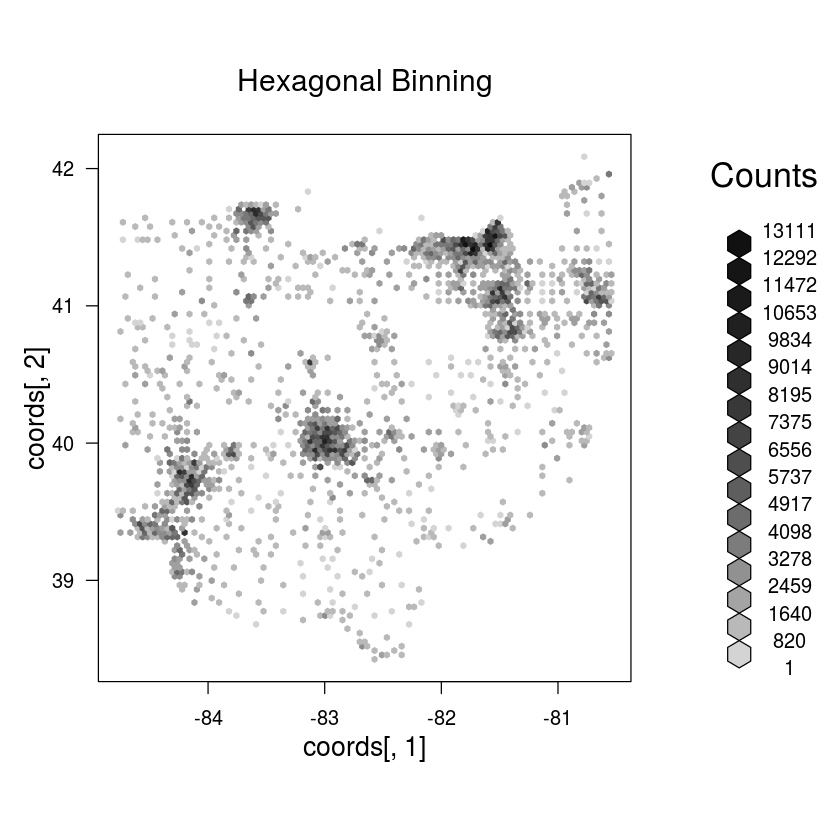

In [84]:
coords <- as.matrix(df[,c('tract_x','tract_y')])
bin<-hexbin(coords[,1],coords[,2], xbins=100) 
plot(bin, main="Hexagonal Binning")

In [85]:
df[is.na(df['lotsizesquarefeet']),'lotsizesquarefeet'] <- 1
df[is.na(df['finishedsquarefeet']),'finishedsquarefeet'] <- 1

In [86]:
summary(df)

    parcelid         lotsizesquarefeet   finishedsquarefeet    tract_x      
 Min.   : 85228616   Min.   :        1   Min.   :    1      Min.   :-84.77  
 1st Qu.:109090364   1st Qu.:     5200   1st Qu.: 1130      1st Qu.:-83.68  
 Median :113182182   Median :     9500   Median : 1464      Median :-82.76  
 Mean   :108593501   Mean   :    43269   Mean   : 1615      Mean   :-82.65  
 3rd Qu.:114998626   3rd Qu.:    21606   3rd Qu.: 1970      3rd Qu.:-81.58  
 Max.   :173269451   Max.   :646299712   Max.   :71323      Max.   :-80.54  
                                                                            
    tract_y      yb_2016_zip5_saleprice
 Min.   :38.42   Min.   :    1375      
 1st Qu.:39.91   1st Qu.:   80797      
 Median :40.69   Median :  129503      
 Mean   :40.55   Mean   :  177392      
 3rd Qu.:41.33   3rd Qu.:  195193      
 Max.   :42.10   Max.   :83579752      
                 NA's   :3040169       

In [87]:
data <- subset(df, !is.nan(df[,'yb_2016_zip5_saleprice']))

In [88]:
str(data)

'data.frame':	71222 obs. of  6 variables:
 $ parcelid              : num  85228619 85228647 85228829 85228868 85228925 ...
 $ lotsizesquarefeet     : num  10500 15800 5000 11050 5304 ...
 $ finishedsquarefeet    : num  1578 2747 1766 2180 2496 ...
 $ tract_x               : num  -81.8 -81.8 -81.7 -81.7 -81.7 ...
 $ tract_y               : num  41.5 41.5 41.5 41.5 41.5 ...
 $ yb_2016_zip5_saleprice: num  295128 357259 15503 47661 37700 ...


In [89]:
summary(data)

    parcelid         lotsizesquarefeet finishedsquarefeet    tract_x      
 Min.   : 85228619   Min.   :      1   Min.   :    1      Min.   :-84.77  
 1st Qu.: 93508681   1st Qu.:   5001   1st Qu.: 1188      1st Qu.:-83.77  
 Median :112875774   Median :   9148   Median : 1524      Median :-82.86  
 Mean   :108164999   Mean   :  30097   Mean   : 1677      Mean   :-82.74  
 3rd Qu.:114785098   3rd Qu.:  18480   3rd Qu.: 2023      3rd Qu.:-81.69  
 Max.   :173269003   Max.   :9913036   Max.   :14700      Max.   :-80.54  
    tract_y      yb_2016_zip5_saleprice
 Min.   :38.42   Min.   :    1375      
 1st Qu.:39.89   1st Qu.:   80797      
 Median :40.44   Median :  129503      
 Mean   :40.52   Mean   :  177392      
 3rd Qu.:41.33   3rd Qu.:  195193      
 Max.   :41.96   Max.   :83579752      

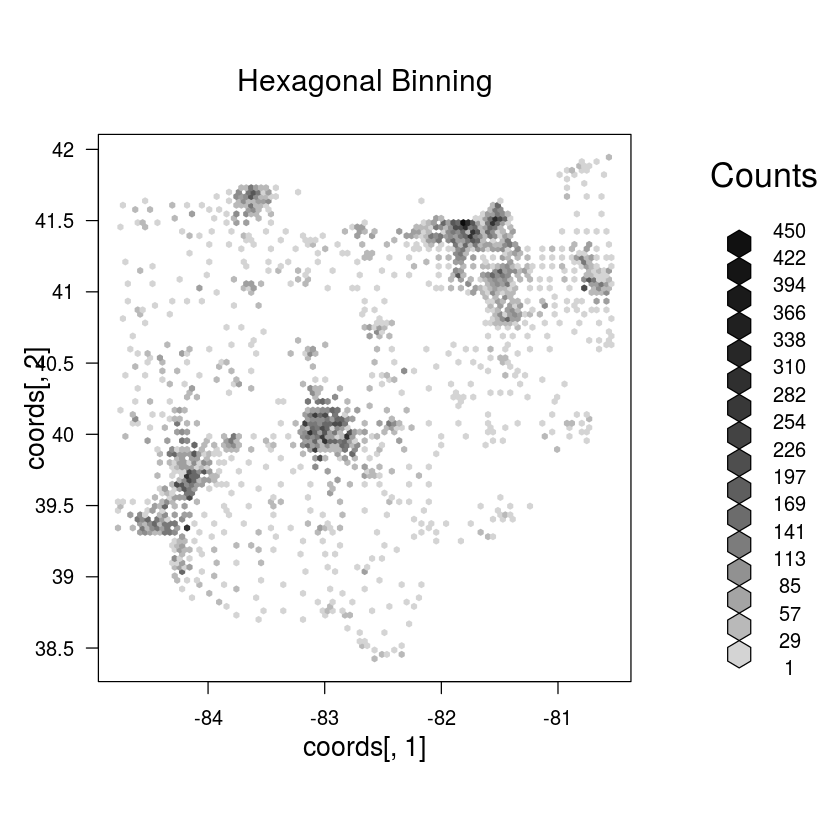

In [90]:
coords <- as.matrix(data[,c('tract_x','tract_y')])
bin<-hexbin(coords[,1],coords[,2], xbins=100) 
plot(bin, main="Hexagonal Binning")

In [91]:
coords <- as.matrix(df[,c('tract_x','tract_y')])

In [92]:
mesh0 <- inla.mesh.2d(loc=coords,max.edge=c(0.1,0.1),offset=c(0.1,0.1),cutoff = 0.01)


In [93]:
mesh0$n

[1] 5855

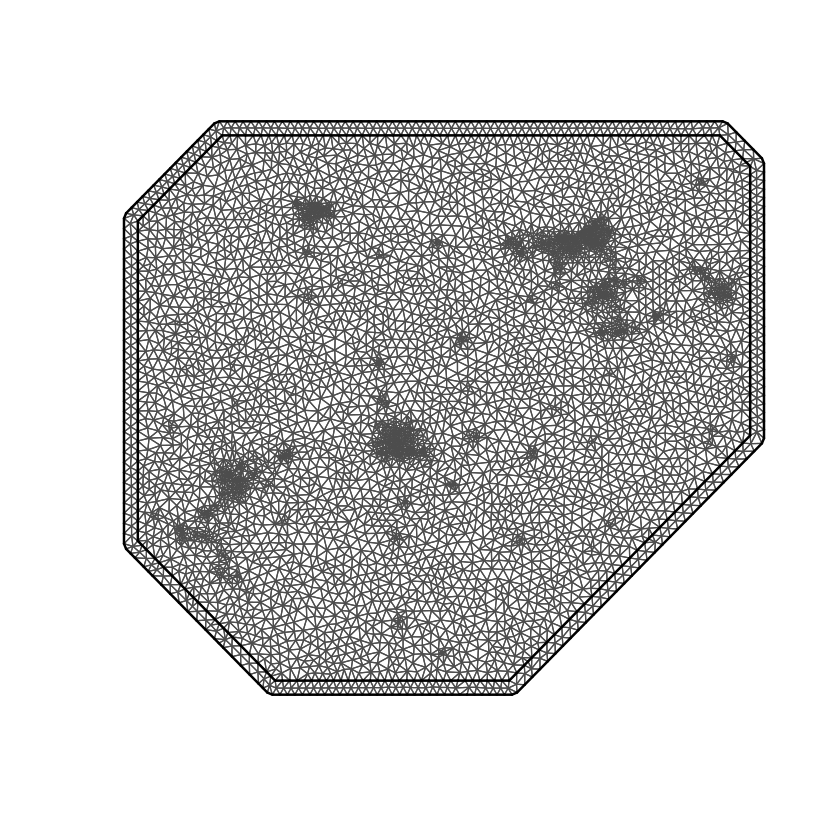

In [94]:
plot(mesh0,main="")

In [99]:
help(inla)

In [79]:
help(inla.spde2.matern)

In [97]:
help(f)

In [44]:
y=data[,"yb_2016_zip5_saleprice"]

In [45]:
cv_splits <- createFolds(y, k = 5,list = TRUE, returnTrain = TRUE)


In [46]:
str(cv_splits)

List of 5
 $ Fold1: int [1:52415] 1 2 4 5 6 7 8 9 12 13 ...
 $ Fold2: int [1:52414] 1 2 3 4 5 7 9 10 11 13 ...
 $ Fold3: int [1:52416] 1 2 3 4 5 6 7 8 9 10 ...
 $ Fold4: int [1:52416] 1 2 3 5 6 7 8 10 11 12 ...
 $ Fold5: int [1:52415] 3 4 6 8 9 10 11 12 13 15 ...


In [47]:
train_data <-  data[cv_splits[[1]],]
test_data<-  data[-cv_splits[[1]],]

In [208]:
for (split in cv_splits) {
    train_data <-  data[split,]
    test_data<-  data[-split,]
    print(dim(train_data))
    print(dim(test_data))
    system.time(
        m3 <- bam(log(yb_2016_zip5_saleprice) ~  te(longitude,latitude,log(lotsizesquarefeet), 
                                                    bs=c("cs","cs","cs"),k=c(15,15,5)) 
                  +te(longitude,latitude,log(finishedsquarefeet), bs=c("cs","cs","cs"),k=c(10,10,5))   , data=train_data)
        )
    summary(m3)
    test_pred <- predict(m3,test_data)
    test_data[,'pred']=test_pred
    a <- abs(test_data[,'pred']-log(test_data[,'yb_2016_zip5_saleprice']))
    a[a>0.4]=0.4
    b <- mean(a,na.rm=TRUE)
    print(b)
}

[1] 52415     6
[1] 13104     6
[1] 0.1321459
[1] 52416     6
[1] 13103     6
[1] 0.1333773
[1] 52414     6
[1] 13105     6
[1] 0.1323619
[1] 52416     6
[1] 13103     6
[1] 0.1333007
[1] 52415     6
[1] 13104     6
[1] 0.1339831


# BBB

In [139]:
my.dir <- "/tmp/"

In [141]:
Piemonte_data <- read.table(paste(my.dir,"Air pollution in Piemonte/Piemonte_data_byday.csv",sep=""),header=TRUE,sep=",")
dim(Piemonte_data)

[1] 4368   11

In [142]:
coordinates <-read.table(paste(my.dir,"Air pollution in Piemonte/coordinates.csv",sep=""),header=TRUE,sep=",")
rownames(coordinates) <- coordinates[,"Station.ID"]
# Borders of Piemonte (in km)
borders <-read.table(paste(my.dir,"Air pollution in Piemonte/Piemonte_borders.csv",sep=""),header=TRUE,sep=",")

n_stations <- length(coordinates$Station.ID) #24 stations
n_data <- length(Piemonte_data$Station.ID) #4368 space-time data
n_days <- n_data/n_stations #182 time points

Piemonte_data$time <- rep(1:n_days, each=n_stations)
coordinates.allyear <- as.matrix(coordinates[Piemonte_data$Station.ID, c("UTMX","UTMY")])
dim(coordinates.allyear)

Piemonte_data$logPM10 <- log(Piemonte_data$PM10)
mean_covariates <- apply(Piemonte_data[,3:10],2,mean)
sd_covariates <- apply(Piemonte_data[,3:10],2,sd)
Piemonte_data[,3:10] <- scale(Piemonte_data[,3:10],center=mean_covariates, scale=sd_covariates)


[1] 4368    2

In [144]:
# Load the covariate arrays (each array except for A is 56x72x182)
load(paste(my.dir,"Air pollution in Piemonte/Covariates/Altitude_GRID.Rdata",sep="")) #A; AltitudeGRID
load(paste(my.dir,"Air pollution in Piemonte/Covariates/WindSpeed_GRID.Rdata",sep="")) #WS; WindSpeedGRID
load(paste(my.dir,"Air pollution in Piemonte/Covariates/HMix_GRID.Rdata",sep="")) #HMIX; HMixMaxGRID
load(paste(my.dir,"Air pollution in Piemonte/Covariates/Emi_GRID.Rdata",sep="")) #EMI; EmiGRID
load(paste(my.dir,"Air pollution in Piemonte/Covariates/Temp_GRID.Rdata",sep="")) #TEMP; Mean_Temp
load(paste(my.dir,"Air pollution in Piemonte/Covariates/Prec_GRID.Rdata",sep="")) #PREC; Prec
# Load the Piemonte grid c(309,529),c(4875,5159),dims=c(56,72)
load(paste(my.dir,"Air pollution in Piemonte/Covariates/Piemonte_grid.Rdata",sep=""))

# Extract the standardized covariate for day i_day (you get a 56X72X8 matrix)
i_day <- 122
which_date <- unique(Piemonte_data$Date)[i_day]
print(paste("**---- You will get a prediction for ", which_date, "---**"))

[1] "**---- You will get a prediction for  30/01/06 ---**"


In [145]:
# Standardise the covariates for the selected day
source(paste(my.dir,"Air pollution in Piemonte/Covariates/covariates_selector.R",sep=""))
library(abind)
covariate_array_std <- covariates_selector_funct(i_day, mean_covariates, sd_covariates)


In [147]:
dim(covariate_array_std)

[1] 56 72  8

In [148]:
# Set to NA the (standardized) altitude values >7 (1000 n)
elevation <- covariate_array_std[,,1]
index_mountains <- which(elevation>7)
elevation[elevation>7] <- NA
covariate_array_std[,,1] <- elevation

In [149]:

# Reshape the 3D array (56x72x8) into a dataframe (4032x8) with the 8 covariates on the columns
covariate_matrix_std <- data.frame(apply(covariate_array_std,3,function(X) c(t(X))))
colnames(covariate_matrix_std) <- colnames(Piemonte_data[,3:10])


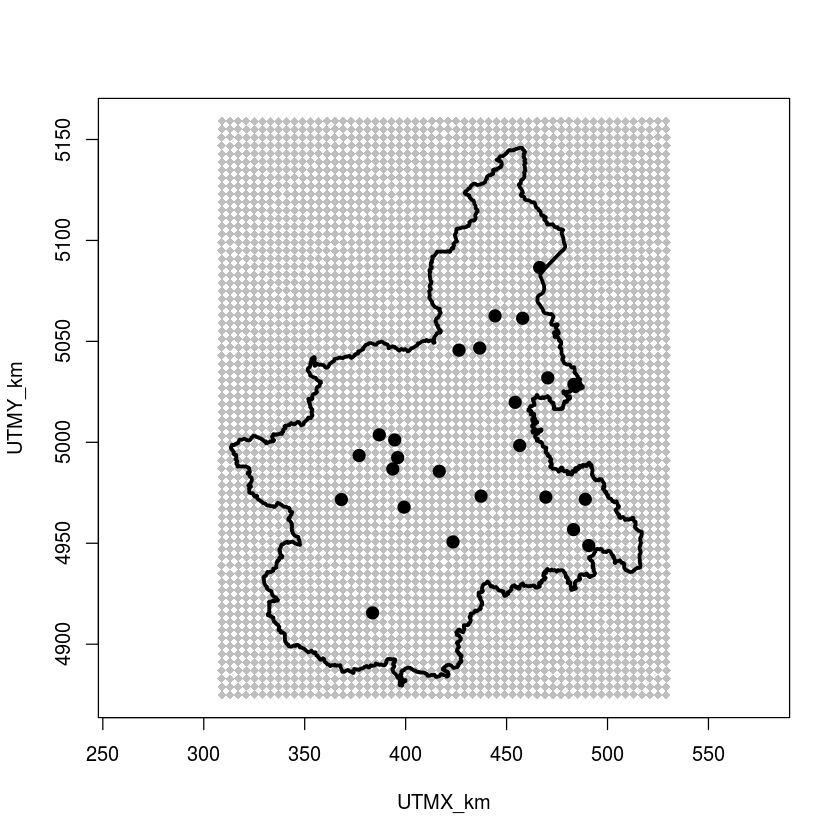

In [150]:
# *** Code for Figure 7.8 top
plot(Piemonte_grid,col="grey",pch=18, asp=1, xlim=range(Piemonte_grid$UTMX_km))
lines(borders, lwd=3, asp=1)
points(coordinates$UTMX, coordinates$UTMY, pch=20, cex=2)
# ***

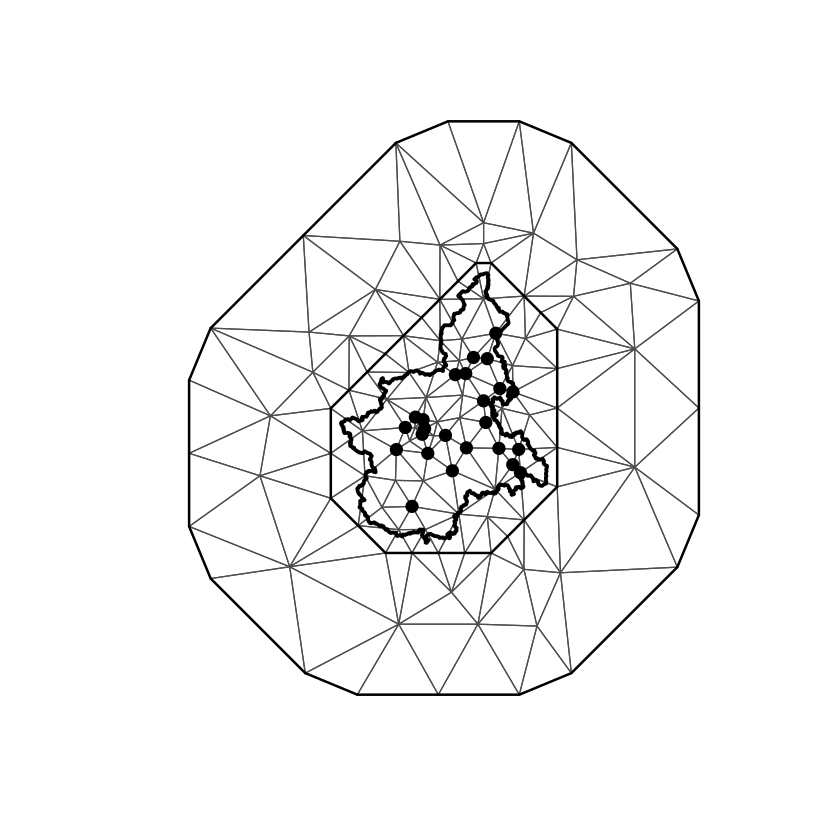

In [151]:

# *** Code for Figure 7.8 bottom
Piemonte_mesh <- inla.mesh.2d(loc=cbind(coordinates$UTMX,coordinates$UTMY), 
                              loc.domain=borders, offset=c(10, 140), max.edge=c(50, 1000))
plot(Piemonte_mesh,asp=1,main="")
lines(borders, lwd=3)
points(coordinates$UTMX, coordinates$UTMY, pch=20, cex=2)
# ***

In [152]:
Piemonte_spde <- inla.spde2.matern(mesh=Piemonte_mesh, alpha=2)
A_est <- inla.spde.make.A(mesh=Piemonte_mesh,
                          loc=coordinates.allyear,
                          group=Piemonte_data$time,
                          n.group=n_days)
dim(A_est)


[1]  4368 22204

In [153]:
s_index <- inla.spde.make.index(name="spatial.field",
                                n.spde=Piemonte_spde$n.spde,
                                n.group=n_days)
names(s_index)

stack_est <- inla.stack(data=list(logPM10=Piemonte_data$logPM10),
                    A=list(A_est, 1),
                    effects=list(c(s_index,list(Intercept=1)), list(Piemonte_data[,3:10])), tag="est")

A_pred <- inla.spde.make.A(mesh=Piemonte_mesh,
                           loc=as.matrix(Piemonte_grid),
                           group=i_day,  #selected day for prediction
                           n.group=n_days)
stack_pred <- inla.stack(data=list(logPM10=NA),
                         A=list(A_pred,1),
                         effects=list(c(s_index,list(Intercept=1)), list(covariate_matrix_std)),
                         tag="pred")

stack <- inla.stack(stack_est, stack_pred)

formula <- logPM10 ~ -1 + Intercept + A + UTMX + UTMY + WS + TEMP + HMIX + PREC + EMI + 
  f(spatial.field, model=Piemonte_spde,group=spatial.field.group, control.group=list(model="ar1"))


[1] "spatial.field"       "spatial.field.group" "spatial.field.repl"

Warning message:
“'cBind' is deprecated.
 Since R version 3.2.0, base's cbind() should work fine with S4 objects”

In [155]:
# ATTENTION: the run is computationally intensive!
system.time(
output <- inla(formula,
       data=inla.stack.data(stack, spde=Piemonte_spde),
       family="gaussian",
       control.predictor=list(A=inla.stack.A(stack), compute=TRUE)) 
    )

Warning message:
“'rBind' is deprecated.
 Since R version 3.2.0, base's rbind() should work fine with S4 objects”

    user   system  elapsed 
1162.004   13.952  272.096 

# AAA

In [104]:
library(spdep)
library(maptools)


Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()


In [105]:
london.gen <- readShapePoly(paste("/tmp/LDNSuicides.shp",sep=""))


Warning message:
“use rgdal::readOGR or sf::st_read”

In [106]:
temp <- poly2nb(london.gen)
nb2INLA("LDN.graph", temp)
LDN.adj <- paste(getwd(),"/LDN.graph",sep="")

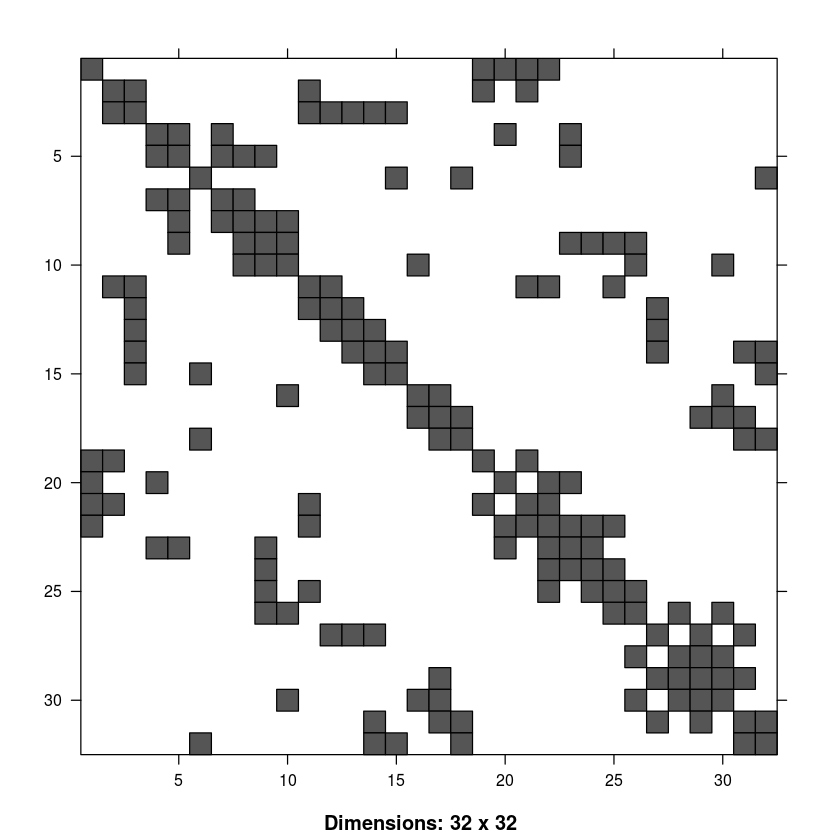

In [107]:
H <- inla.read.graph(filename="LDN.graph")
image(inla.graph2matrix(H),xlab="",ylab="")

In [112]:
load(paste("/tmp/LondonSuicides.RData",sep=""))


In [135]:
formula <- y ~ 1 + E*f(ID, model="bym",graph=LDN.adj)

names <- sort(london.gen$NAME) 
data.suicides <- data.frame(NAME=names, y=y, E=E, x1=x1, x2=x2)
Nareas <- length(data.suicides[,1])


In [136]:
# The order of the areas needs to be the same between the data and the spatial polygon object obtained importing the shapefile, so we re-order the data
data.boroughs <- attr(london.gen, "data")
order <- match(data.boroughs$NAME,data.suicides$NAME)
data.suicides <- data.suicides[order,]
data.suicides$ID <- seq(1,Nareas)
# Include in the london.gen dataframe the ID variable  1:32 (because SP_Id is 0:31)
attr(london.gen, "data") <- merge(data.boroughs,data.suicides,by="NAME")


Warning message in merge.data.frame(data.boroughs, data.suicides, by = "NAME"):
“column names ‘y.x’, ‘E.x’, ‘x1.x’, ‘x2.x’, ‘ID.x’, ‘y.y’, ‘E.y’, ‘x1.y’, ‘x2.y’, ‘ID.y’, ‘y.x’, ‘E.x’, ‘x1.x’, ‘x2.x’, ‘ID.x’, ‘y.y’, ‘E.y’, ‘x1.y’, ‘x2.y’, ‘ID.y’ are duplicated in the result”

In [137]:
mod.suicides <- inla(formula,family="poisson",
              data=data.suicides,E=E,
              control.compute=list(dic=TRUE))

Warning message in rt[i] <- ind:
“number of items to replace is not a multiple of replacement length”

ERROR: Error in model.frame.default(new.fix.formula, data.same.len, na.action = inla.na.action): invalid type (list) for variable 'f(ID, model = "bym", graph = LDN.adj)'


In [117]:
round(mod.suicides$summary.fixed,3) 
round(head(mod.suicides$summary.random$ID),3) #partial output

exp.b0.mean <- inla.emarginal(exp,mod.suicides$marginals.fixed[[1]])
exp.b0.mean
exp.b0.95CI <- inla.qmarginal(c(0.025,0.975), inla.tmarginal(exp,mod.suicides$marginals.fixed[[1]]))
exp.b0.95CI

mean  sd    0.025quant 0.5quant 0.975quant mode  kld
(Intercept) 0.045 0.023 -0.001     0.045    0.09       0.045 0

ID mean   sd    0.025quant 0.5quant 0.975quant mode   kld
1 1   0.464 0.064  0.336      0.465    0.589      0.466 0  
2 2   0.012 0.073 -0.134      0.013    0.154      0.015 0  
3 3  -0.138 0.075 -0.287     -0.137    0.007     -0.135 0  
4 4   0.310 0.080  0.151      0.310    0.464      0.312 0  
5 5  -0.135 0.080 -0.295     -0.134    0.019     -0.132 0  
6 6  -0.420 0.095 -0.612     -0.419   -0.237     -0.415 0

[1] 1.045916

[1] 0.9992179 1.0936996